**ANSWER FOR Q-3**

## **An Introduction to ECG and ECG Signals**

#### Introduction to an ECG

Electrocardiogram is a method by which electrical pulses of heart are captured noninvasively. These pulses are basically the ionic currents which cause a Periodic Signal varying with Time.[ 1 ](http://jmscr.igmpublication.org/home/index.php/current-issue/100-archive/volume-4-issue-01-jan-2016/471-ecg-signal-conditioning). The intensity of these signals is extremely low and they need to be amplified in order to be measured. Electrodes placed onto the skin experience these pulses in the form of Potential Differences which are then read and transmitted to a computer or plotter which are then analyzed to reach to a definite conclusion.[2 ](http://pubmedcentralcanada.ca/pmcc/articles/PMC4273439/Finding) out how long a wave takes to transit from one part of the heart to the next shows if the electrical activity is normal or slow, fast or irregular. Irregular heart beats are known as Arrhythmias. Secondly, by measuring the amount of electrical activity passing through the heart muscle, a cardiologist may be able to find out if parts of the heart are too large or are overworked.

#### ECG Signals and their Measurement
ECG Signals are those signals that carry important information about Heart of a Human Being. <br>The most famous method for ECG Signal Measurement is the **12-Lead Recording System**[ 1 ](https://www2.humusoft.cz/www/papers/tcp11/091_parak.pdf). In this method, 10 Electrodes are placed on the extremities and chest wall to measure the signals from 12 sources. This method consists of 3 Standard Bipolar Leads which uses *3 electrodes* to form an **Einthoven’s Triangle**; while the rest are Unipolar Augmented Leads and remaining are Chest Leads. 

[ 4](http://www.ni.com/tutorial/6349/en/)A signal conditioning circuit is used to achieve this. These signals travel from Skin to the Electrode, then pass through a Conditioning Circuit which give definite output and the same are traced by the Computer. 
The QRS complex is the combination of three of the graphical deflections seen on a typical electrocardiogram (ECG). It corresponds to the depolarization of the right and left ventricles of the human heart. 

**1. Data Aquisition** : To acquire data to feed to computer with least loss of information.
<br>**2. Signal Conditioning** : To use several techiques to eliminate noise.
<br>**3. Feature Extraction** : To extract vital peaks including the QRS Complex.
<br>**4. Hypothesis testing** : To implement several techniques that may define further course of action.<br>


**References**


**1.  ECG Signal Conditioning **<br>
*Research Gate - JMSCR Vol || 04 || Issue ||01 || Page 8850-8853*<br> 
*Ms. Pushpa Gowtha*

**2.  ECG SIGNAL PROCESSING AND HEART RATE  FREQUENCY DETECTION METHODS **
    <br>*Department of Circuit Theory, <br>Faculty of Electrical Engineering
    <br>Czech Technical University in Prague
    J. Parak and J. Halvik*
    
**3.  Implementation of a portable device for real-time ECG signal analysis**
<br>*BioMedical Engineering OnLine*
<br>*T Jeon, B Kim, M Jeon, BG Lee* 

**4.  National Instruments - LabVIEW for ECG Signal Processing – Tutorial
Publish Date: Aug 01, 2017**

**5.  IJCSNS International Journal of Computer Science and Network Security**, *<br>VOL. 14  No .11, November 2014  <br>Removing Power Line Interferences using Adaptive Filtering <br>
M. Sushmita and T. Balaji*




**ANSWER FOR Q-4**

## **ECG Signal File (*aami3a.dat*) Code**

In [1]:
%matplotlib inline

import numpy as np

import pandas as pd

import pylab as pl

import scipy as sp
import scipy.linalg

import matplotlib.pyplot as plt

ECG = open('aami3a.dat','rb')

AllSignal = np.fromfile(ECG,count=-1,dtype=np.uint16)

print('\n The length of the Signal is: ' + str(len(AllSignal)) + ' Samples')
print(AllSignal)


 The length of the Signal is: 43081 Samples
[2072 2072 2070 ..., 2075 2075 2075]


**ANSWER FOR Q-4 contd.**


 The lenght of the Time Array is: 43081


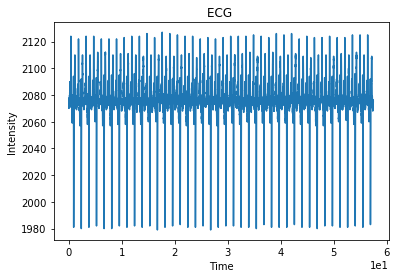

In [2]:
x=np.arange(0,43081/750.,1/750.)
print('\n The lenght of the Time Array is: ' + str(len(x)))

plt.plot(x,AllSignal[0:43081])
plt.title('ECG ')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

**ANSWER FOR Q-9**

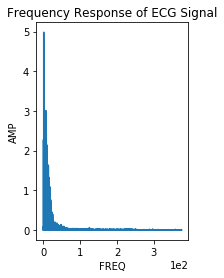

In [3]:
FirstLine=AllSignal[0:43081]

dataF=FirstLine-np.mean(FirstLine)

L=len(dataF)

f=np.arange(0,750/2.,750/43081.)

Y=np.fft.fft(dataF)

PyyClean=abs(Y)/L

plt.subplot(121)
plt.xlabel('FREQ')
plt.ylabel('AMP')
plt.plot(f, PyyClean[:21541])
plt.title('Frequency Response of ECG Signal')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

**ANSWER FOR Q-10 & Q-11**

In order to otain frequency at the maximum point, we can allow only some frequencies to pass through defined frequency band. Then we can compare it with Threshold Frequency and can judge which one is the most peak frequncy within given samples.

From the spectrum, we can say that Heart Rate can be obtained by considering a Cycle period and then calculating Total Beats. The Rate is then directly calcuated by taking the ratio of Total Beats obtained to the Samplig Time of assumed Samples.

**ANSWER FOR Q-5**
<br><br>
In order to obtain 5 beats in the Signal,
we assume that let Avg. Heart Rate be 100 BPM. <br>
If it is considered over a period of 60 s,
We get the Samples = (1 / Time for 5 Samples) 
effectively (1/100/60)*5. <br>
Finally dividing by inverse of Sampling Time of 750 Hz we get the Total Number of Samples.

In [4]:
%matplotlib inline
m=100.0
n=60.0
t=(m/n)
samples=t*5*750
print(samples)

6250.0


**ANSWER FOR Q-5 contd.**


 The Samples are plotted below: 6520


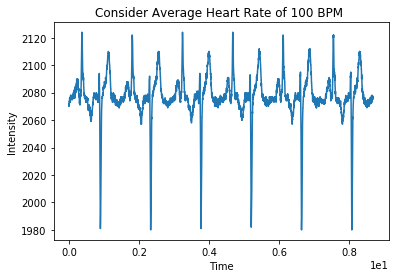

In [5]:
x=np.arange(0,6520/750.,1/750.)
print('\n The Samples are plotted below: ' + str(len(x)))
ECG = open('aami3a.dat','rb')
AllSignal = np.fromfile(ECG,count=-1,dtype=np.uint16)
plt.plot(x,AllSignal[0:6520])
plt.title('Consider Average Heart Rate of 100 BPM ')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

**ANSWER FOR Q-6**

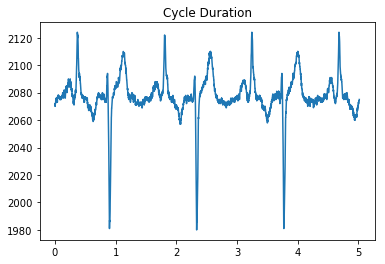

In [6]:
#%matplotlib nbagg

Zoom=np.arange(0,43081/750.,1/750.)

inx=np.where(Zoom>5)
inx=inx[0]
#plt.subplot(122)
plt.plot(Zoom[:inx[10]], AllSignal[:inx[10]])
plt.title('Cycle Duration')
plt.ticklabel_format(style='sci', axis='x', scilimits=(10,10))

**ANSWER FOR Q-7 & Q-8**<br>

For the ***Image shown*** , an Easy way to calculate the rate is based on the entire ECG being 10 seconds. By counting the number of QRS complexes and multiplying by six, the number per minute can be calculated — because 10 seconds times six equals 60 seconds, or 1 minute. This is a better method when the QRS complexes are irregular, as during atrial fibrillation, in which case the RR intervals may vary from beat to beat. 
<br> The Heart Rate can be calculated by above procedure. If it lies between 60-100 BPM it means it is Normal else heart is suffering from Arrythmias.

**ANSWER FOR Q-12 & Q-13**<br>

From the Waveform, we understand that the **QRS Complex** is the most important section. There are two different rates that can be determined on an ECG. The atrial rate is indicated by the frequency of the P waves. The ventricular rate is indicated by the frequency of the QRS complexes. The P-Wave represents Depolarization of Left and Right Atrium ; QRS Section represents Left and Right Ventricular Depolarization ; ST-T Section – Ventricular Repolarization. <br>*The normal duration (interval) of the QRS complex is between 0.08 and 0.10 seconds — that is, 80 and 100 milliseconds.When the duration is between 0.10 and 0.12 seconds, it is intermediate or slightly prolonged. A QRS duration of greater than 0.12 seconds is considered abnormal.* <br> <br>
***It depends on the Filter which is being used.*** A case application of an **IIR Filter**, speedier response, few memory elements, the Amplitude shall not change. They employ feedback loop which can remove the Noise Error. But it affects the Amplitude as it introduces Non Linear Phase due to addition of Poles and can make system unstable. In case if Ripples are generated while Band Passing, **FIR Filters** may be used. They have delays but do not affect the Amplitude while Filtering.

**ANSWER FOR Q-14 & Q-15**

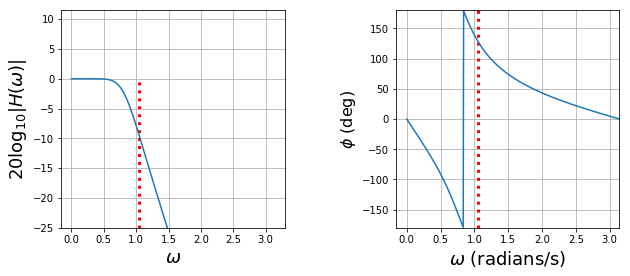

In [7]:
%matplotlib inline

from __future__ import division

from scipy.signal import butter
from scipy.signal import freqz

from scipy import signal 

import matplotlib.pyplot as plt

from matplotlib import gridspec

fig=plt.figure()
fig.set_size_inches((10,10))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

Fmax=750.0
CutOff=100.0
NF=(1/2)*Fmax
SF=CutOff/NF

b,a=signal.butter(4,SF,btype='lowpass',analog=False)
w,h=signal.freqz(b,a)

ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.plot(w,20*np.log10(abs(h)))
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
ax.set_xlabel(r"$\omega$",fontsize=18)
ax.vlines(np.pi/3,-25,0,linestyles=':',color='r',lw=3.)
ax.set_ylim(ymin=-25)
ax.grid()

ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax.plot(w,np.angle(h)/np.pi*180)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=16)
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-180,ymax=180)
ax.vlines(np.pi/3,-180,180,linestyles=':',color='r',lw=3.)
ax.grid()

**ANSWER FOR Q-16**

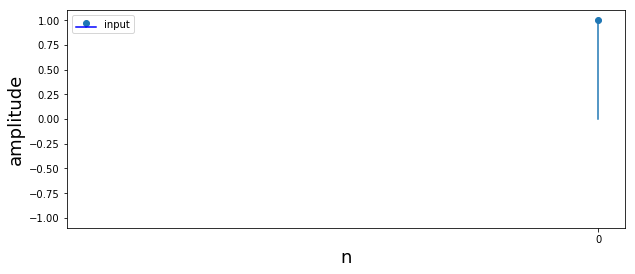

In [18]:
%matplotlib inline

from __future__ import division

from scipy.signal import butter
from scipy.signal import freqz
from scipy.signal import lfilter

from scipy import signal 

import matplotlib.pyplot as plt

from matplotlib import gridspec

fig=plt.figure()
fig.set_size_inches((10,10))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

Fmax=750.0 
CutOff=100.0 
NF=(1/2)*Fmax
SF=CutOff/NF

b,a=signal.butter(4,SF,btype='lowpass',analog=False)
w,h=signal.freqz(b,a)

ax = fig.add_subplot(plt.subplot(gs[1,:]))

n= np.arange(SF)

x = np.cos(np.arange(SF)*np.pi/3.)  
y= signal.lfilter(b,1,x)  

ax.stem(n,x,label='input',basefmt='b-')
ax.plot(n,x,':')

#ax.stem(n[SF-1:],y[:-SF+1],markerfmt='r+',linefmt='r-',label='output')
#ax.plot(n[SF-1:],y[:-SF+1],'r:')

ax.set_xlim(xmin=-1.1)
ax.set_ylim(ymin=-1.1,ymax=1.1)

ax.set_xlabel("n",fontsize=18)
ax.set_xticks(n)

ax.set_ylabel("amplitude",fontsize=18)
ax.legend(loc=0)

ValueError: x and y must have same first dimension, but have shapes (1L,) and (6520L,)

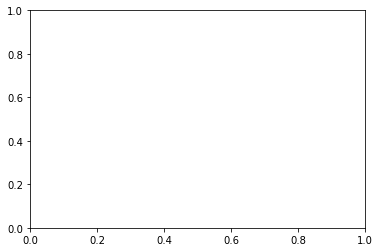

In [9]:
%matplotlib inline
totlines=np.arange(6520)
for index in totlines:
    FiltSignal=AllSignal[index*6520:(index+1)*6520]
    plt.plot(x,AllSignal[index*6520:(index+1)*6520])
    plt.xlabel('Time')
    plt.ylabel('Unsigned Integer Value')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

**ANSWER FOR Q-16 contd.**<br>

We need to call the Filtered Signal and perform a DFT on it. As follows : 

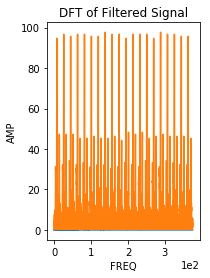

In [12]:
FirstLine=AllSignal[0:43081]

dataF=FirstLine-np.mean(FirstLine)

L=len(dataF)

f=np.arange(0,750/2.,750/43081.)

Y=np.fft.fft(dataF)

PyyClean=abs(Y)/L

#plt.subplot(121)
#plt.xlabel('FREQ')
#plt.ylabel('AMP')
#plt.plot(f, PyyClean[:21541])
#plt.title('Frequency Response of ECG Signal')
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

dataN=Y-np.mean(Y)
Filter=len(dataN)

f=np.arange(0,750/2.,750/43081.)
U=np.fft.fft(dataN)
PyyFilter=abs(U)/Filter

plt.subplot(121)
plt.plot(f, PyyFilter[:21541])
plt.title('DFT of Filtered Signal')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

**ANSWER FOR Q-17** <br>

Mostly, the R-R Wave is taken into consideration. *According to NCBI US National Library of Congress, on using Band Pass Filters while determination of Heart Rate, there is an introduction of Error while interpreting the ST Segment and further ion implementation, some properties needs to be kept in mind.* <br>We know that a IIR Filter has a non-linear phase and introduces poles to the system which indirectly changes the Order of the system. <br>Hence certain vital information may be lost while applying Filters. Also Ripples are generated when a Band Pass Filter is used which may cause deviations and continuous upheavels in the Signals generated. <br>Hence it is extremely important to consider the after-effets of Filter while deciding a Heart Rate of a Patient.